In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [3]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [4]:
df = pd.read_csv(url,names=columns)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Dataset Shape

In [7]:
df.shape

(32561, 15)

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.size

488415

### Feature Engineering

Checking for null Values 

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [11]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Replacing ' ?' with Nan for data cleaning

In [12]:
df.replace(' ?',np.nan,inplace=True)

In [13]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [14]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

#### Salary

In [15]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
df = df.replace({' <=50K':0,' >50K':1})

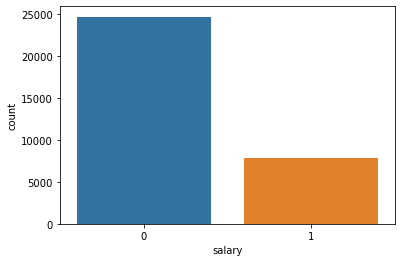

In [17]:
sns.countplot(df['salary'])

In [18]:
df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

#### Workclass

In [19]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [21]:
df= df.replace(' Without-pay', ' Never-worked')

In [22]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Never-worked           21
Name: workclass, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

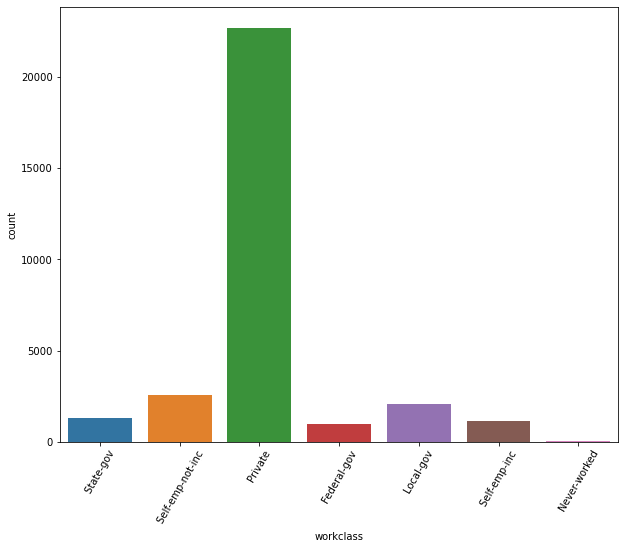

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

In [24]:
df['workclass'].fillna('0',inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

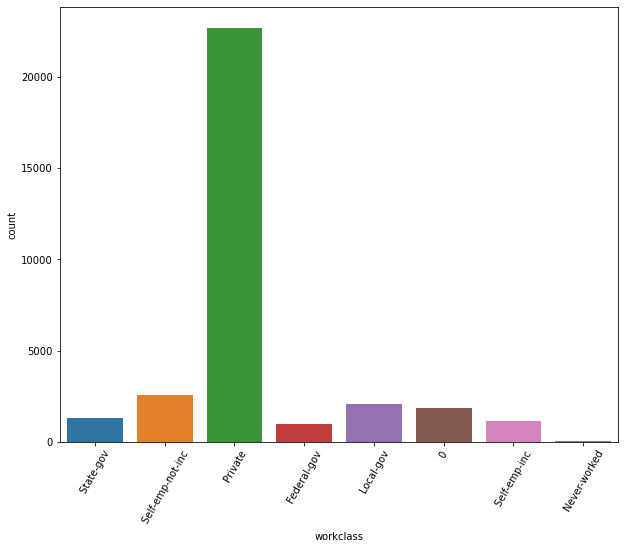

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

#### Fnlwgt

In [26]:
df['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [27]:
df['fnlwgt'] = df['fnlwgt'].apply(lambda x :np.log1p(x))

df['fnlwgt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlwgt, dtype: float64

#### Education

In [28]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

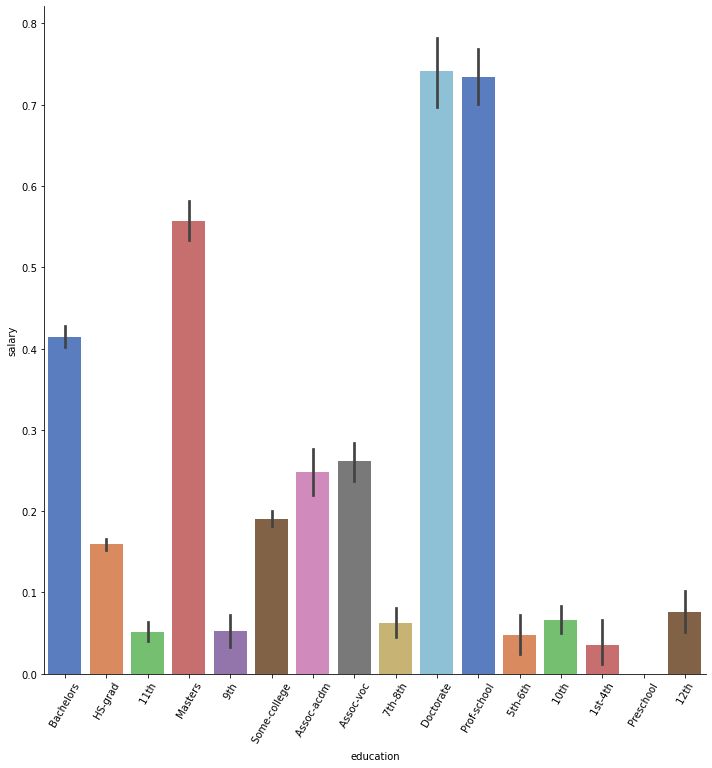

In [29]:
sns.catplot(x='education',y='salary',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)

In [30]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary'
    else:
        return x

In [31]:
df['education'] = df['education'].apply(primary)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

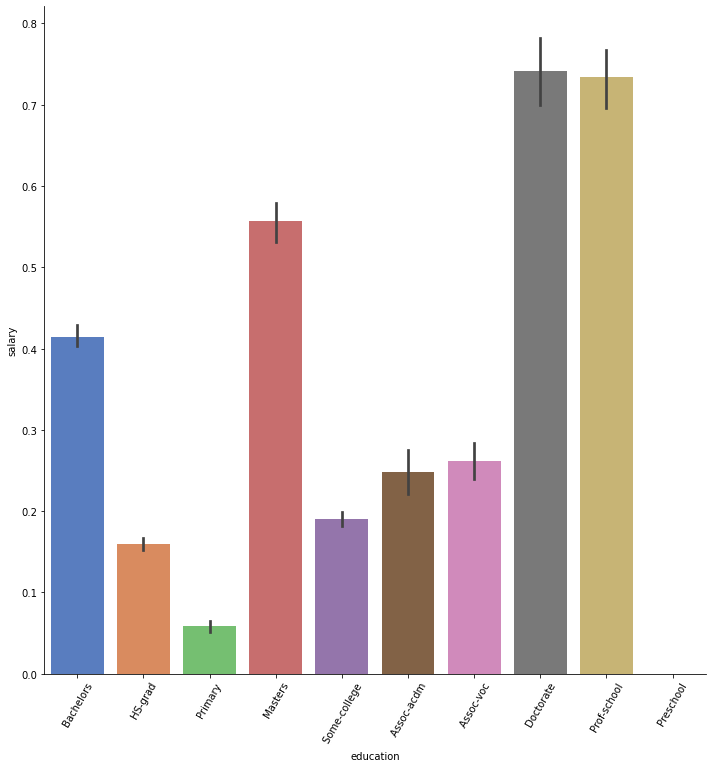

In [32]:
sns.catplot(x='education',y='salary',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)

#### Marital-status

In [33]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [34]:
df['marital-status'].replace(' Married-AF-spouse', ' Married-civ-spouse',inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

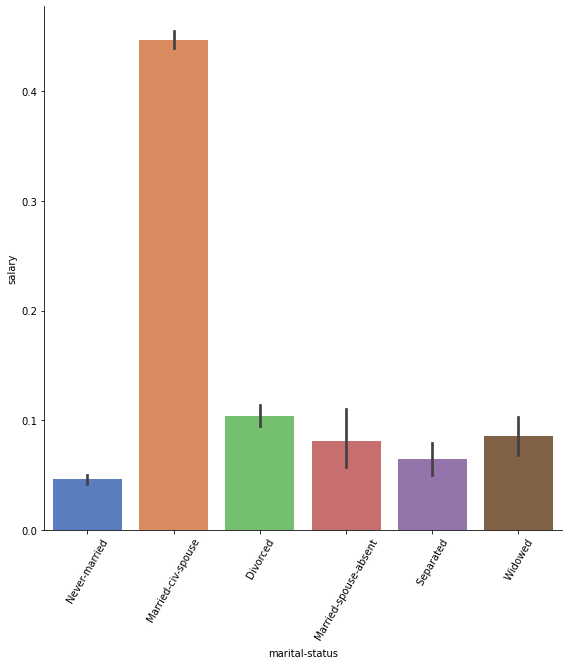

In [35]:
sns.catplot(x='marital-status',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

#### Occupation

In [36]:
df['occupation'].fillna('0',inplace=True)

df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [37]:
df['occupation'].replace(' Armed-Forces','0',inplace=True)

df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1852
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

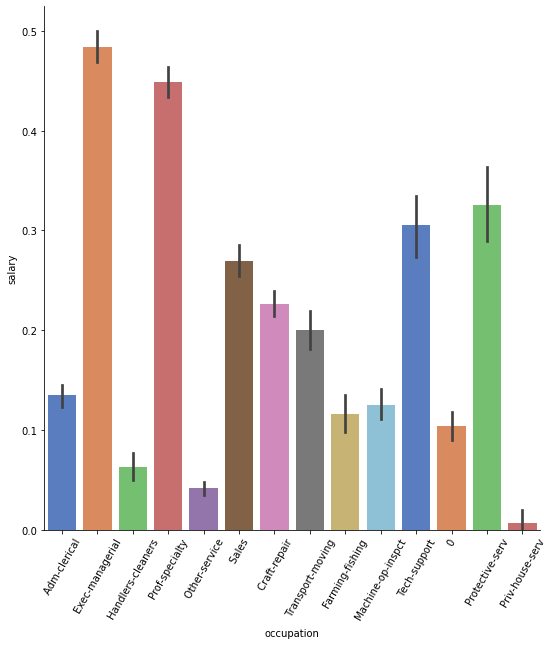

In [38]:
sns.catplot(x='occupation',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

#### Relationship

In [39]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

#### Race

In [40]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

#### Sex

In [41]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [42]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

#### Native-Country

In [43]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [44]:
def native(country):
    if country in [' United-States',' Canada']:
        return 'North_America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central_America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'EU'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asian'
    else:
        return country

In [45]:
df['native-country'] = df['native-country'].apply(native)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

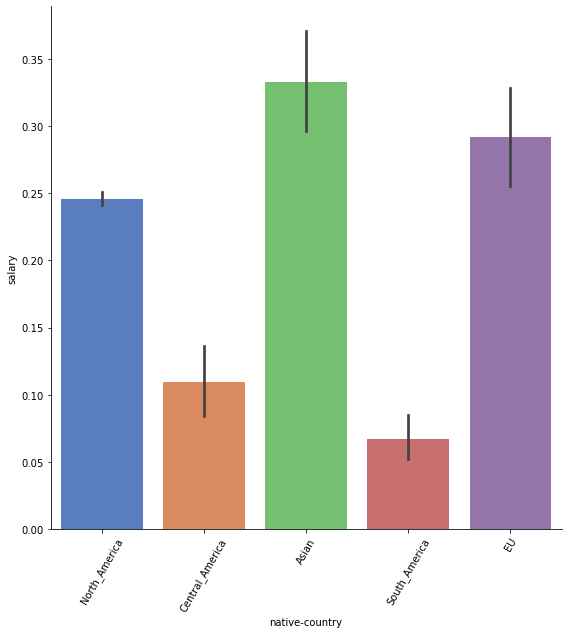

In [46]:
sns.catplot(x='native-country',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

Let's check our data's correlation with the help of Heatmap

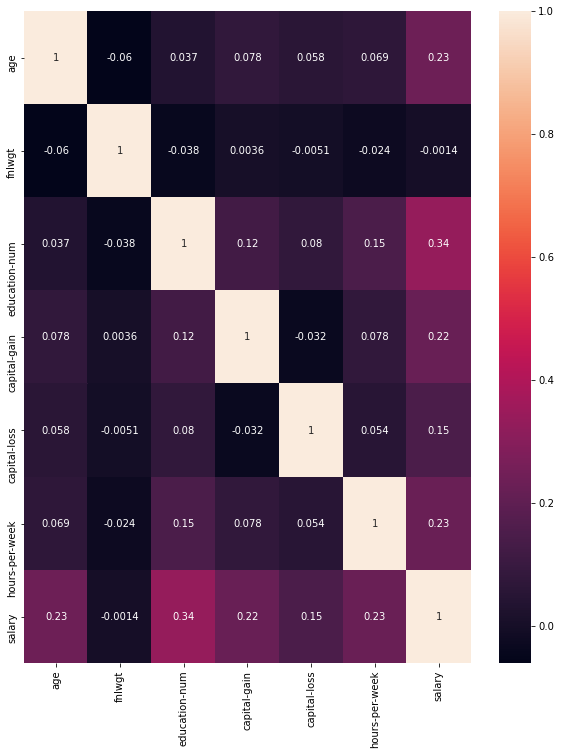

In [47]:
corr = df.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr,annot=True)

As we can see that corr values of fnlwgt are very low, Hence we can drop it safely.

In [48]:
df.drop('fnlwgt',axis=1,inplace=True)

In [49]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North_America,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,North_America,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North_America,0
3,53,Private,Primary,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,North_America,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Central_America,0


### Dividing Data into 'X' and 'y'

In [50]:
X = df.drop('salary',axis=1)
y = df['salary']

In [51]:
X.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

Converting Categorical data into Numerical Data 

In [52]:
X_d = pd.get_dummies(X)

In [53]:
X_d.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_Asian,native-country_Central_America,native-country_EU,native-country_North_America,native-country_South_America
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0


#### Train_Test_Split

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_d,y,test_size=0.3,random_state=101)

In [55]:
x_train.shape

(22792, 61)

In [56]:
y_train.shape

(22792,)

#### On Applying Algorithms & Evaluating the Models

### 1. Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)

C:\Users\Prathamesh Deshpande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Applying Hyperparams for LogReg model to get best model score

In [58]:
penalty = ['l1', 'l2']
# C is the inverese of regularization parameter
C = np.logspace(0, 4, 10)
random_state=[0]
# creating a dictionary of hyperparameters
hyperparameters = dict(C=C, penalty=penalty, 
                  random_state=random_state)

### GridSearchCV for LogReg

In [59]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(Lr,param_grid=hyperparameters,cv=5,verbose=3,n_jobs=-1)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.9s finished
C:\Users\Prathamesh Deshpande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'random_state': [0]},
             verbose=3)

Best_params

In [60]:
gsv.best_params_

{'C': 2.7825594022071245, 'penalty': 'l2', 'random_state': 0}

In [61]:
lr_tuned = LogisticRegression(C=2.7825594022071245,penalty='l2',random_state=0)

In [62]:
lr_tuned.fit(x_train,y_train)

C:\Users\Prathamesh Deshpande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=2.7825594022071245, random_state=0)

In [63]:
Log_Reg =lr_tuned.score(x_test,y_test)

In [64]:
lr_y_pred = lr_tuned.predict(x_test)

### Logistic Regression Model Evaluation

In [65]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc
print(f"Accuracy_Score:{accuracy_score(y_test,lr_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,lr_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,lr_y_pred)}")

Accuracy_Score:0.8281297983416931
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7436
           1       0.69      0.52      0.59      2333

    accuracy                           0.83      9769
   macro avg       0.77      0.72      0.74      9769
weighted avg       0.82      0.83      0.82      9769

**************************************************
Confusion_Matrix:[[6881  555]
 [1124 1209]]


### 2. Decision Tree 

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

#### Applying grid_params with GridsearchCv for DTC model to get best model score

In [67]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [68]:
gsv = GridSearchCV(dtc,param_grid=grid_param,cv=5,verbose=3,n_jobs=-1)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 3064 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 4024 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 5112 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 6328 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 7672 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 9144 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 10744 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 12472 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 12960 out of 12

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=3)

Bestparams

In [69]:
gsv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'splitter': 'best'}

In [70]:
dtc_tuned = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=6,min_samples_split=3,splitter='best')

In [71]:
dtc_tuned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=3)

In [72]:
Dtc = dtc_tuned.score(x_test,y_test)

### Decision Tree Classifier Model Evaluation

In [73]:
dtc_y_pred = dtc_tuned.predict(x_test)

In [74]:
print(f"Accuracy_Score:{accuracy_score(y_test,dtc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,dtc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,dtc_y_pred)}")

Accuracy_Score:0.8594533729143208
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7436
           1       0.77      0.58      0.66      2333

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7043  393]
 [ 980 1353]]


### 3. Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

#### Applying grid_params with GridsearchCv for RFC model to get best model score

In [76]:
grid_params = {"n_estimators" : [10,15,25,30],
              "max_depth" : range(1,10,2),
              "min_samples_leaf" : range(1,10,1),
              "min_samples_split" : range(2,10,1),
              "max_features" : ['auto','log2']
              }

In [77]:
gsv = GridSearchCV(rfc,param_grid=grid_params,cv=5,n_jobs=-1,verbose=3)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 3064 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 4024 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 5112 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6328 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 7672 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 9144 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 10744 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 12056 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 12984 tasks    

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10, 2),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [10, 15, 25, 30]},
             verbose=3)

In [78]:
gsv.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 30}

In [79]:
rfc_tuned = RandomForestClassifier(max_depth=9,max_features='auto',min_samples_leaf=3,min_samples_split=4,n_estimators=30)

In [80]:
rfc_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=30)

In [81]:
RFC = rfc_tuned.score(x_test,y_test)

### RandomForest Classifier Model Evaluation

In [82]:
rfc_y_pred = rfc_tuned.predict(x_test)

In [83]:
print(f"Accuracy_Score:{accuracy_score(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,rfc_y_pred)}")

Accuracy_Score:0.8603746545193981
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7436
           1       0.80      0.55      0.65      2333

    accuracy                           0.86      9769
   macro avg       0.84      0.75      0.78      9769
weighted avg       0.86      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7119  317]
 [1047 1286]]


### 4. KNN Classifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [85]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,25,27,30],
               'n_neighbors' : [3,7,9,11]
              }

In [86]:
gsv = GridSearchCV(knc,param_grid=param_grid,verbose=3)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.832, total=   2.3s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.839, total=   2.2s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.839, total=   2.2s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.833, total=   2.2s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.833, total=   2.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.838, total=   2.4s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.842, total=   2.2s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.840, total=   2.4s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.842, total= 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.844, total=   2.6s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.845, total=   2.4s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.841, total=   2.4s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.847, total=   2.5s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.832, total=   2.4s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.839, total=   2.6s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.839, tot

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.843, total=   2.1s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.843, total=   1.9s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.844, total=   2.1s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.844, total=   2.1s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.844, total=   1.9s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.842, total=   1.9s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.846, total=   1.9s
[CV] 

[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.833, total=   1.1s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.839, total=   1.4s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.841, total=   1.4s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.840, total=   1.3s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.843, total=   1.4s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.840, total=   1.4s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.842, total=   1.4s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=27, n_neighbors=11, score=0.845, total=   1.5s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.831, total=   1.2s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.838, total=   1.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.839, total=   1.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.835, total=   1.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.833, total=   1.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, score=0.839, total=   1.4s
[CV] algorithm=brute

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  7.6min finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 25, 27, 30],
                         'n_neighbors': [3, 7, 9, 11]},
             verbose=3)

In [87]:
gsv.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 18, 'n_neighbors': 11}

In [88]:
knc_tuned = KNeighborsClassifier(algorithm='kd_tree',leaf_size=18,n_neighbors=11)
knc_tuned.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=18, n_neighbors=11)

In [89]:
KNN = knc_tuned.score(x_test,y_test)

In [90]:
knc_y_pred = knc_tuned.predict(x_test)

### KNN Classifier Model Evaluation

In [91]:
print(f"Accuracy_Score:{accuracy_score(y_test,knc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,knc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,knc_y_pred)}")

Accuracy_Score:0.8523902139420616
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7436
           1       0.72      0.63      0.67      2333

    accuracy                           0.85      9769
   macro avg       0.80      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

**************************************************
Confusion_Matrix:[[6852  584]
 [ 858 1475]]


### 5. XGBoost Classifier

In [92]:
from xgboost import XGBClassifier
xbc = XGBClassifier()
xbc.fit(x_train,y_train)

C:\Users\Prathamesh Deshpande\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
param_grid={
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,7,9,11,15],
    'n_estimators':[10,50,100,200,300]   
}

In [94]:
gsv = GridSearchCV(xbc,param_grid=param_grid,verbose=3)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[18:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.852, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[18:25:55] W

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Prathamesh Deshpande\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[18:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.851, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[18:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.876, total=   0.4s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[18:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.868, total=   0.4s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 ..........

[CV]   learning_rate=1, max_depth=3, n_estimators=300, score=0.877, total=   1.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=300 .................
[18:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=3, n_estimators=300, score=0.871, total=   1.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=300 ..........

[CV]   learning_rate=1, max_depth=5, n_estimators=50, score=0.875, total=   0.3s
[CV]  learning_rate=1, max_depth=5, n_estimators=50 ..................
[18:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=5, n_estimators=50, score=0.870, total=   0.3s
[CV]  learning_rate=1, max_depth=5, n_estimators=50 .............

[CV]   learning_rate=1, max_depth=5, n_estimators=200, score=0.872, total=   0.9s
[CV]  learning_rate=1, max_depth=5, n_estimators=200 .................
[18:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=5, n_estimators=200, score=0.863, total=   1.0s
[CV]  learning_rate=1, max_depth=5, n_estimators=200 ..........

[CV]   learning_rate=1, max_depth=7, n_estimators=10, score=0.861, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=10 ..................
[18:26:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:26:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=7, n_estimators=10, score=0.864, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=50 .............

[CV]   learning_rate=1, max_depth=7, n_estimators=100, score=0.864, total=   0.7s
[CV]  learning_rate=1, max_depth=7, n_estimators=100 .................
[18:26:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:26:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=7, n_estimators=100, score=0.869, total=   0.7s
[CV]  learning_rate=1, max_depth=7, n_estimators=200 ..........

[CV]   learning_rate=1, max_depth=7, n_estimators=300, score=0.858, total=   2.0s
[CV]  learning_rate=1, max_depth=7, n_estimators=300 .................
[18:26:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:26:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=7, n_estimators=300, score=0.859, total=   2.1s
[CV]  learning_rate=1, max_depth=9, n_estimators=10 ...........

[CV]   learning_rate=1, max_depth=9, n_estimators=50, score=0.866, total=   0.5s
[CV]  learning_rate=1, max_depth=9, n_estimators=50 ..................
[18:26:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:26:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=9, n_estimators=50, score=0.869, total=   0.5s
[CV]  learning_rate=1, max_depth=9, n_estimators=100 ............

[CV]   learning_rate=1, max_depth=9, n_estimators=200, score=0.857, total=   1.8s
[CV]  learning_rate=1, max_depth=9, n_estimators=200 .................
[18:27:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:27:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=9, n_estimators=200, score=0.862, total=   1.8s
[CV]  learning_rate=1, max_depth=9, n_estimators=300 ..........


[18:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=11, n_estimators=10, score=0.867, total=   0.2s
[CV]  learning_rate=1, max_depth=11, n_estimators=50 .................
[18:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default eva

[CV]   learning_rate=1, max_depth=11, n_estimators=100, score=0.862, total=   1.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=200 ................
[18:27:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:27:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=11, n_estimators=200, score=0.850, total=   2.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=200 .......

[CV]   learning_rate=1, max_depth=11, n_estimators=300, score=0.851, total=   3.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=10 .................
[18:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=15, n_estimators=10, score=0.856, total=   0.2s
[CV]  learning_rate=1, max_depth=15, n_estimators=10 .........

[CV]   learning_rate=1, max_depth=15, n_estimators=50, score=0.861, total=   0.8s
[CV]  learning_rate=1, max_depth=15, n_estimators=100 ................
[18:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=15, n_estimators=100, score=0.850, total=   1.6s
[CV]  learning_rate=1, max_depth=15, n_estimators=100 ........

[CV]   learning_rate=1, max_depth=15, n_estimators=200, score=0.849, total=   3.0s
[CV]  learning_rate=1, max_depth=15, n_estimators=300 ................
[18:28:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:28:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=15, n_estimators=300, score=0.841, total=   4.5s
[CV]  learning_rate=1, max_depth=15, n_estimators=300 .......

[CV]   learning_rate=0.5, max_depth=3, n_estimators=50, score=0.868, total=   0.2s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50 ................
[18:28:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:28:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=3, n_estimators=50, score=0.865, total=   0.2s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50 .......

[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.868, total=   0.7s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[18:28:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:28:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.867, total=   0.7s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ....


[18:28:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=5, n_estimators=10, score=0.864, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=10 ................
[18:28:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:28:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default ev

[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.875, total=   0.5s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[18:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.869, total=   0.5s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ....

[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=0.870, total=   1.4s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[18:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=0.861, total=   1.5s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ....

[CV]   learning_rate=0.5, max_depth=7, n_estimators=50, score=0.875, total=   0.4s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=50 ................
[18:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=7, n_estimators=50, score=0.867, total=   0.4s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=50 .......

[CV]   learning_rate=0.5, max_depth=7, n_estimators=200, score=0.866, total=   1.4s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=200 ...............
[18:29:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:29:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=7, n_estimators=200, score=0.859, total=   1.3s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=200 ....

[CV]   learning_rate=0.5, max_depth=9, n_estimators=10, score=0.863, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=10 ................
[18:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=9, n_estimators=10, score=0.863, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=50 .......

[CV]   learning_rate=0.5, max_depth=9, n_estimators=100, score=0.860, total=   0.9s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=100 ...............
[18:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=9, n_estimators=100, score=0.864, total=   1.0s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=200 ....

[CV]   learning_rate=0.5, max_depth=9, n_estimators=300, score=0.853, total=   2.5s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=300 ...............
[18:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=9, n_estimators=300, score=0.857, total=   2.5s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=10 ....

[CV]   learning_rate=0.5, max_depth=11, n_estimators=50, score=0.860, total=   0.6s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=50 ...............
[18:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=11, n_estimators=50, score=0.866, total=   0.6s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=100 ...

[CV]   learning_rate=0.5, max_depth=11, n_estimators=200, score=0.857, total=   2.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=200 ..............
[18:30:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:30:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=11, n_estimators=200, score=0.856, total=   2.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=300 .

[CV]   learning_rate=0.5, max_depth=15, n_estimators=10, score=0.859, total=   0.2s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10 ...............
[18:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=15, n_estimators=10, score=0.863, total=   0.2s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=50 ....

[CV]   learning_rate=0.5, max_depth=15, n_estimators=100, score=0.857, total=   1.5s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=100 ..............
[18:30:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:30:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=15, n_estimators=100, score=0.855, total=   1.6s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=200 .

[CV]   learning_rate=0.5, max_depth=15, n_estimators=300, score=0.848, total=   4.7s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=300 ..............
[18:31:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:31:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=15, n_estimators=300, score=0.848, total=   4.6s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10 ...

[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.864, total=   0.2s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[18:31:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:31:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.869, total=   0.2s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ......

[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=0.870, total=   0.7s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[18:31:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:31:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=0.877, total=   0.7s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300 ....


[18:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.856, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[18:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default ev

[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.875, total=   0.5s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ...............
[18:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=5, n_estimators=200, score=0.863, total=   1.0s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ....

[CV]   learning_rate=0.1, max_depth=5, n_estimators=300, score=0.867, total=   1.5s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=10 ................
[18:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=7, n_estimators=10, score=0.862, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=10 ......

[CV]   learning_rate=0.1, max_depth=7, n_estimators=50, score=0.873, total=   0.4s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100 ...............
[18:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=7, n_estimators=100, score=0.866, total=   0.7s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100 .....

[CV]   learning_rate=0.1, max_depth=7, n_estimators=200, score=0.863, total=   1.4s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=300 ...............
[18:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=7, n_estimators=300, score=0.857, total=   2.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=300 ....

[CV]   learning_rate=0.1, max_depth=9, n_estimators=50, score=0.867, total=   0.5s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=50 ................
[18:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=9, n_estimators=50, score=0.864, total=   0.5s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=50 .......

[CV]   learning_rate=0.1, max_depth=9, n_estimators=200, score=0.855, total=   1.9s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=200 ...............
[18:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=9, n_estimators=200, score=0.854, total=   1.7s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=200 ....

[CV]   learning_rate=0.1, max_depth=11, n_estimators=10, score=0.862, total=   0.2s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=10 ...............
[18:32:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:32:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=11, n_estimators=10, score=0.865, total=   0.2s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=10 ....

[CV]   learning_rate=0.1, max_depth=11, n_estimators=100, score=0.856, total=   1.2s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=100 ..............
[18:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=11, n_estimators=100, score=0.858, total=   1.2s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=100 .

[CV]   learning_rate=0.1, max_depth=11, n_estimators=300, score=0.846, total=   3.2s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=300 ..............
[18:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=11, n_estimators=300, score=0.848, total=   3.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=300 .

[CV]   learning_rate=0.1, max_depth=15, n_estimators=50, score=0.855, total=   0.8s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=50 ...............
[18:33:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:33:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=15, n_estimators=50, score=0.855, total=   0.8s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=50 ....

[CV]   learning_rate=0.1, max_depth=15, n_estimators=200, score=0.844, total=   4.4s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=200 ..............
[18:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=15, n_estimators=200, score=0.845, total=   3.9s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=200 .

[CV]   learning_rate=0.01, max_depth=3, n_estimators=10, score=0.858, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10 ...............
[18:34:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=3, n_estimators=10, score=0.851, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10 ....

[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.876, total=   0.4s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[18:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.868, total=   0.4s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 .

[CV]   learning_rate=0.01, max_depth=3, n_estimators=300, score=0.877, total=   1.0s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=300 ..............
[18:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=3, n_estimators=300, score=0.871, total=   1.0s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=300 .

[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.875, total=   0.3s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ...............
[18:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.870, total=   0.3s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ....

[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.872, total=   1.0s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[18:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.863, total=   1.0s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 .

[CV]   learning_rate=0.01, max_depth=7, n_estimators=10, score=0.861, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10 ...............
[18:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=7, n_estimators=10, score=0.864, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=50 ....

[CV]   learning_rate=0.01, max_depth=7, n_estimators=100, score=0.864, total=   0.7s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=100 ..............
[18:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=7, n_estimators=100, score=0.869, total=   0.7s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=200 .

[CV]   learning_rate=0.01, max_depth=7, n_estimators=300, score=0.858, total=   2.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=300 ..............
[18:35:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:35:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=7, n_estimators=300, score=0.859, total=   2.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=10 ..

[CV]   learning_rate=0.01, max_depth=9, n_estimators=50, score=0.866, total=   0.5s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=50 ...............
[18:35:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:35:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=9, n_estimators=50, score=0.869, total=   0.5s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=100 ...

[CV]   learning_rate=0.01, max_depth=9, n_estimators=200, score=0.857, total=   1.8s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=200 ..............
[18:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=9, n_estimators=200, score=0.862, total=   1.9s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=300 .

[18:35:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=11, n_estimators=10, score=0.864, total=   0.2s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=10 ..............
[18:35:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:35:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default e

[CV]   learning_rate=0.01, max_depth=11, n_estimators=100, score=0.860, total=   1.2s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=100 .............
[18:36:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:36:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=11, n_estimators=100, score=0.862, total=   1.2s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=20

[CV]   learning_rate=0.01, max_depth=11, n_estimators=300, score=0.848, total=   3.2s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=300 .............
[18:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=11, n_estimators=300, score=0.851, total=   3.2s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=10

[CV]   learning_rate=0.01, max_depth=15, n_estimators=50, score=0.859, total=   0.9s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=50 ..............
[18:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=15, n_estimators=50, score=0.861, total=   0.8s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=100 

[CV]   learning_rate=0.01, max_depth=15, n_estimators=200, score=0.851, total=   3.3s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=200 .............
[18:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=15, n_estimators=200, score=0.849, total=   3.2s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=30


[18:37:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.868, total=   0.2s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[18:37:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:37:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default 

[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.868, total=   0.7s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[18:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.867, total=   0.8s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=20

[CV]   learning_rate=0.001, max_depth=5, n_estimators=10, score=0.859, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10 ..............
[18:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=5, n_estimators=10, score=0.864, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10 .

[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=0.866, total=   0.6s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100 .............
[18:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=0.875, total=   0.6s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10

[CV]   learning_rate=0.001, max_depth=5, n_estimators=300, score=0.863, total=   1.6s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=300 .............
[18:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=5, n_estimators=300, score=0.870, total=   1.7s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=30

[CV]   learning_rate=0.001, max_depth=7, n_estimators=50, score=0.866, total=   0.6s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50 ..............
[18:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=7, n_estimators=50, score=0.875, total=   0.6s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50 .

[CV]   learning_rate=0.001, max_depth=7, n_estimators=200, score=0.861, total=   1.7s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=200 .............
[18:38:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:38:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=7, n_estimators=200, score=0.866, total=   1.6s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=20

[CV]   learning_rate=0.001, max_depth=9, n_estimators=10, score=0.864, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=10 ..............
[18:38:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:38:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=9, n_estimators=10, score=0.867, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=10 .

[CV]   learning_rate=0.001, max_depth=9, n_estimators=100, score=0.857, total=   0.9s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=100 .............
[18:38:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:38:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=9, n_estimators=100, score=0.869, total=   0.9s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=10

[CV]   learning_rate=0.001, max_depth=9, n_estimators=300, score=0.848, total=   2.6s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=300 .............
[18:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=9, n_estimators=300, score=0.853, total=   2.6s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=30

[CV]   learning_rate=0.001, max_depth=11, n_estimators=50, score=0.863, total=   0.6s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=50 .............
[18:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=11, n_estimators=50, score=0.865, total=   0.7s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=5

[CV]   learning_rate=0.001, max_depth=11, n_estimators=200, score=0.850, total=   2.3s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=200 ............
[18:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=11, n_estimators=200, score=0.855, total=   2.3s
[CV]  learning_rate=0.001, max_depth=11, n_estimators

[CV]   learning_rate=0.001, max_depth=15, n_estimators=10, score=0.859, total=   0.3s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=10 .............
[18:39:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:39:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=15, n_estimators=10, score=0.864, total=   0.3s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=1

[CV]   learning_rate=0.001, max_depth=15, n_estimators=100, score=0.850, total=   1.6s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=100 ............
[18:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=15, n_estimators=100, score=0.854, total=   1.6s
[CV]  learning_rate=0.001, max_depth=15, n_estimators

[CV]   learning_rate=0.001, max_depth=15, n_estimators=300, score=0.842, total=   4.7s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=300 ............
[18:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=15, n_estimators=300, score=0.847, total=   4.7s
[CV]  learning_rate=0.001, max_depth=15, n_estimators

[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed: 14.5min finished


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                           

In [95]:
gsv.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 200}

In [96]:
xbc_tuned = XGBClassifier(learning_rate=1,max_depth=3,n_estimators=200)
xbc_tuned.fit(x_train,y_train)

[18:42:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
XBc = xbc_tuned.score(x_test,y_test)
print(XBc)

0.8686661889650936


### XGBoost_Classifier Model Evaluation

In [98]:
xbc_y_pred = xbc_tuned.predict(x_test)

In [99]:
print(f"Accuracy_Score:{accuracy_score(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,rfc_y_pred)}")

Accuracy_Score:0.8603746545193981
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7436
           1       0.80      0.55      0.65      2333

    accuracy                           0.86      9769
   macro avg       0.84      0.75      0.78      9769
weighted avg       0.86      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7119  317]
 [1047 1286]]


Lets compare all the Models with its Model score by a table

In [100]:
df = {'Models':['Logistic_Reg','Decision Tree','Random Forest','KNN','XGBoost_Classifier'],'Model_Scores':[Log_Reg,Dtc,RFC,KNN,XBc]}
pd.DataFrame(df)

,Models,Model_Scores
0,Logistic_Reg,0.828130
1,Decision Tree,0.859453
2,Random Forest,0.860375
3,KNN,0.852390
4,XGBoost_Classifier,0.868666


From Above table we can come to conclusion that XG boost classifier is the best as it gives high model scores when compared to other models